In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot3 as uproot
import pandas as pd
from tqdm import tqdm

In [2]:
use_fixed_upload = True
include_energy_shift = False

In [3]:
if use_fixed_upload:
    
    # from fixed hepdata upload
    
    # need to shift by one, "#: table_doi: 10.17182/hepdata.114862.v1/t5" first line of file is gone from the sandbox

    nueCC_FC_res_raw = np.genfromtxt("data/HEPData-1648593425-v1-csv/nu_eCCFCEnergyResolution.csv", delimiter=",", skip_header=7-1, dtype=float)

    nueCC_FC_bkg_raw = np.genfromtxt("data/HEPData-1648593425-v1-csv/nu_eCCFC.csv", delimiter=",", skip_header=7+26+2-1, skip_footer=2+26+2+26-2, dtype=float)
    nueCC_FC_sig_plus_bkg_raw = np.genfromtxt("data/HEPData-1648593425-v1-csv/nu_eCCFC.csv", delimiter=",", skip_header=7+26+2+2+26-1, skip_footer=2+26-1, dtype=float)




    nueCC_PC_res_raw = np.genfromtxt("data/HEPData-1648593425-v1-csv/nu_eCCPCEnergyResolution.csv", delimiter=",", skip_header=7-1, dtype=float)

    nueCC_PC_bkg_raw = np.genfromtxt("data/HEPData-1648593425-v1-csv/nu_eCCPC.csv", delimiter=",", skip_header=7+26+2-1, skip_footer=2+26+2+26-2, dtype=float)
    nueCC_PC_sig_plus_bkg_raw = np.genfromtxt("data/HEPData-1648593425-v1-csv/nu_eCCPC.csv", delimiter=",", skip_header=7+26+2+2+26-1, skip_footer=2+26-1, dtype=float)

else:
    nueCC_FC_res_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_eCCFCEnergyResolution.csv", delimiter=",", skip_header=7, dtype=float)

    nueCC_FC_bkg_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_eCCFC.csv", delimiter=",", skip_header=7+26+2, skip_footer=2+26+2+26-2, dtype=float)
    nueCC_FC_sig_plus_bkg_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_eCCFC.csv", delimiter=",", skip_header=7+26+2+2+26, skip_footer=2+26-1, dtype=float)




    nueCC_PC_res_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_eCCPCEnergyResolution.csv", delimiter=",", skip_header=7, dtype=float)

    nueCC_PC_bkg_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_eCCPC.csv", delimiter=",", skip_header=7+26+2, skip_footer=2+26+2+26-2, dtype=float)
    nueCC_PC_sig_plus_bkg_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_eCCPC.csv", delimiter=",", skip_header=7+26+2+2+26, skip_footer=2+26-1, dtype=float)


In [4]:
nueCC_FC_res = []
nueCC_PC_res = []

for i in range(60):
    for j in range(60):
        nueCC_FC_res.append(nueCC_FC_res_raw[i * 60 + j][2])
        nueCC_PC_res.append(nueCC_PC_res_raw[i * 60 + j][2])

bin_centers_x = []
bin_centers_y = []
for i in range(60):
    for j in range(60):
        bin_centers_x.append((i + 0.5) / 60. * 3000.)
        bin_centers_y.append((j + 0.5) / 60. * 3000.)
        
b = (60, 60)
r = ((0, 3000), (0, 3000))

/Users/lmh227/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


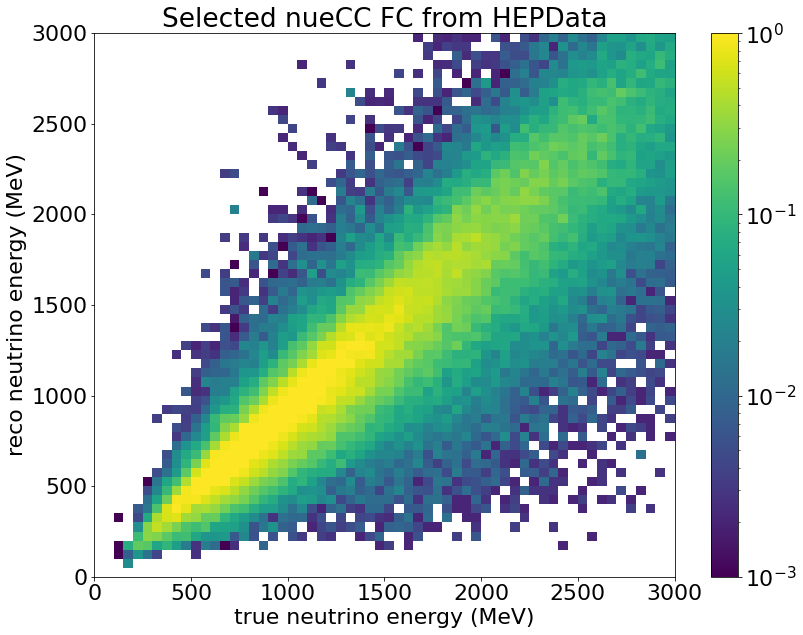

/Users/lmh227/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


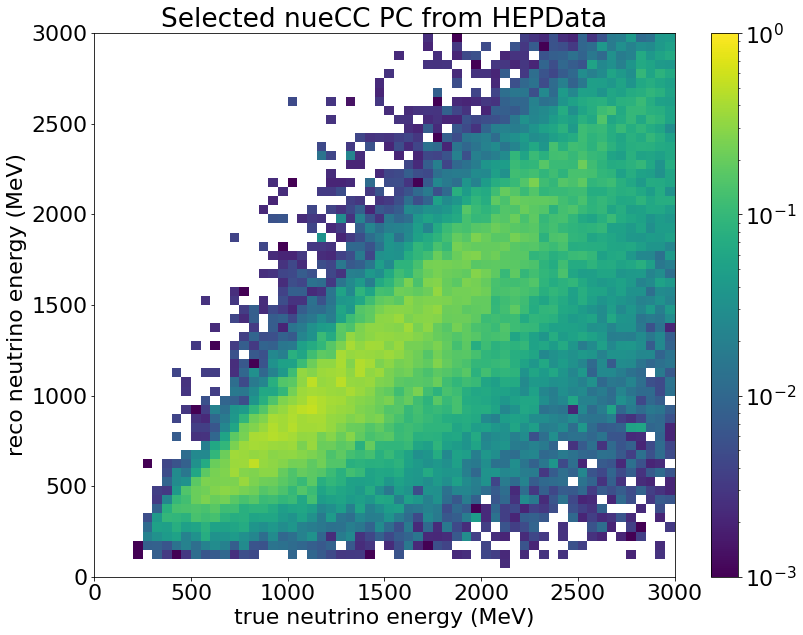

In [5]:
mpl.rcParams.update({'font.size': 22})

if use_fixed_upload:

    plt.figure(figsize=(13,10))
    plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_FC_res, norm=mpl.colors.LogNorm(), vmin=1e-3, vmax=1)
    plt.colorbar()
    plt.xlabel("true neutrino energy (MeV)")
    plt.ylabel("reco neutrino energy (MeV)")
    plt.title("Selected nueCC FC from HEPData")
    plt.show()

    plt.figure(figsize=(13,10))
    plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_PC_res, norm=mpl.colors.LogNorm(), vmin=1e-3, vmax=1)
    plt.colorbar()
    plt.xlabel("true neutrino energy (MeV)")
    plt.ylabel("reco neutrino energy (MeV)")
    plt.title("Selected nueCC PC from HEPData")
    plt.show()
    
else:
    plt.figure(figsize=(13,10))
    plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_FC_res, norm=mpl.colors.LogNorm(), vmin=1, vmax=1000)
    plt.colorbar()
    plt.xlabel("true neutrino energy (MeV)")
    plt.ylabel("reco neutrino energy (MeV)")
    plt.title("Selected nueCC FC from HEPData")
    plt.show()

    plt.figure(figsize=(13,10))
    plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_PC_res, norm=mpl.colors.LogNorm(), vmin=1, vmax=1000)
    plt.colorbar()
    plt.xlabel("true neutrino energy (MeV)")
    plt.ylabel("reco neutrino energy (MeV)")
    plt.title("Selected nueCC PC from HEPData")
    plt.show()


In [6]:
nueCC_FC_sig = []
for i in range(25):
    nueCC_FC_sig.append(nueCC_FC_sig_plus_bkg_raw[i][3] - nueCC_FC_bkg_raw[i][3])
    
nueCC_PC_sig = []
for i in range(25):
    nueCC_PC_sig.append(nueCC_PC_sig_plus_bkg_raw[i][3] - nueCC_PC_bkg_raw[i][3])

b = 25
r = (0, 2500)

bin_centers = [_ * 100 + 50 for _ in range(25)]
bin_edges = [_ * 100 for _ in range(26)]

In [7]:
if include_energy_shift:
    
    #shift_val = 100 # MeV
    shift_val = 50

    nueCC_FC_sig_from_matrix = [0. for _ in range(25)]
    for i in range(60):
        for j in range(60):
            for n in range(25):
                if bin_edges[n] + shift_val < bin_centers_y[i * 60 + j] < bin_edges[n + 1] + shift_val:
                    nueCC_FC_sig_from_matrix[n] += nueCC_FC_res[i * 60 + j]

    nueCC_PC_sig_from_matrix = [0. for _ in range(25)]
    for i in range(60):
        for j in range(60):
            for n in range(25):
                if bin_edges[n] + shift_val < bin_centers_y[i * 60 + j] < bin_edges[n + 1] + shift_val:
                    nueCC_PC_sig_from_matrix[n] += nueCC_PC_res[i * 60 + j]

else:
    
    nueCC_FC_sig_from_matrix = [0. for _ in range(25)]
    for i in range(60):
        for j in range(60):
            for n in range(25):
                if bin_edges[n] < bin_centers_y[i * 60 + j] < bin_edges[n + 1]:
                    nueCC_FC_sig_from_matrix[n] += nueCC_FC_res[i * 60 + j]

    nueCC_PC_sig_from_matrix = [0. for _ in range(25)]
    for i in range(60):
        for j in range(60):
            for n in range(25):
                if bin_edges[n] < bin_centers_y[i * 60 + j] < bin_edges[n + 1]:
                    nueCC_PC_sig_from_matrix[n] += nueCC_PC_res[i * 60 + j]

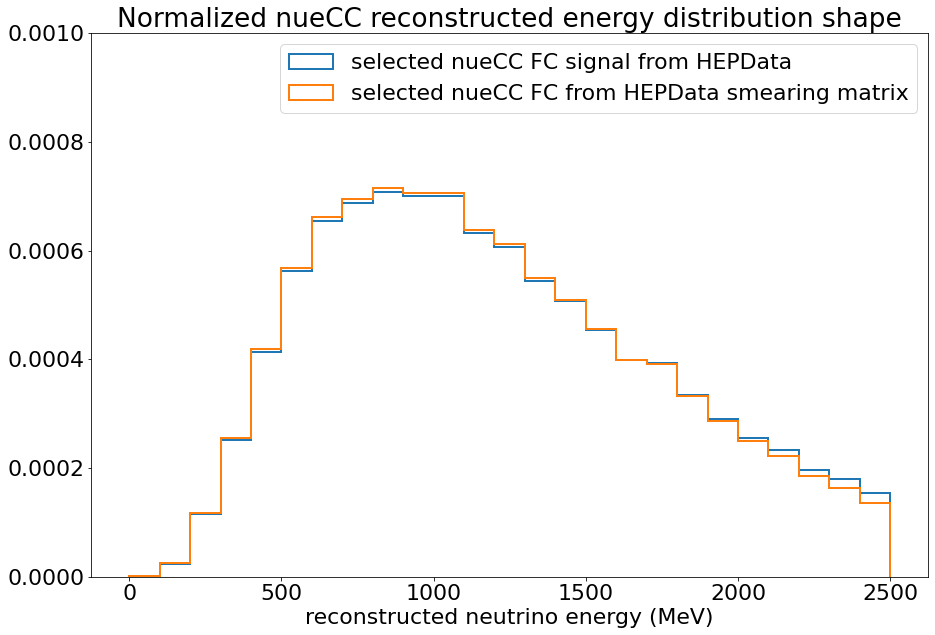

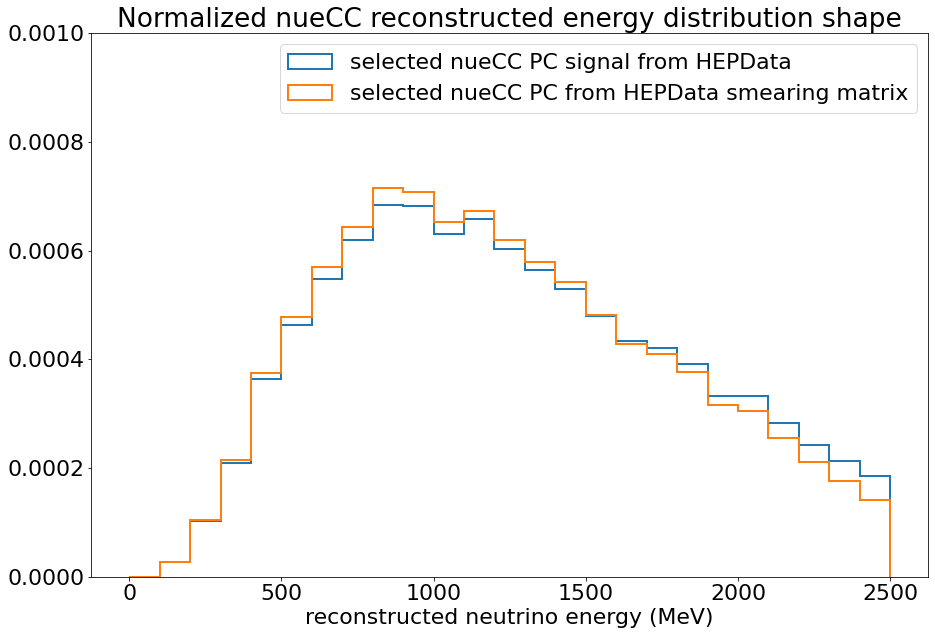

In [8]:
lw = 2

plt.figure(figsize=(15, 10))
plt.hist(bin_centers, weights=nueCC_FC_sig, bins=b, range=r, histtype="step", label="selected nueCC FC signal from HEPData", linewidth=lw, density=True)
plt.hist(bin_centers, weights=nueCC_FC_sig_from_matrix, bins=b, range=r, histtype="step", label="selected nueCC FC from HEPData smearing matrix", linewidth=lw, density=True)
plt.legend()
plt.xlabel("reconstructed neutrino energy (MeV)")
plt.title("Normalized nueCC reconstructed energy distribution shape")
plt.ylim(0, 0.001)
plt.show()

plt.figure(figsize=(15, 10))
plt.hist(bin_centers, weights=nueCC_PC_sig, bins=b, range=r, histtype="step", label="selected nueCC PC signal from HEPData", linewidth=lw, density=True)
plt.hist(bin_centers, weights=nueCC_PC_sig_from_matrix, bins=b, range=r, histtype="step", label="selected nueCC PC from HEPData smearing matrix", linewidth=lw, density=True)
plt.legend()
plt.xlabel("reconstructed neutrino energy (MeV)")
plt.title("Normalized nueCC reconstructed energy distribution shape")
plt.ylim(0, 0.001)
plt.show()